In [74]:
data("PimaIndiansDiabetes2", package = "mlbench")

str(PimaIndiansDiabetes2)

sapply(PimaIndiansDiabetes2, function(x)sum(is.na(x)))

data <- ( PimaIndiansDiabetes2)
data$triceps <- NULL
data$insulin <- NULL
data <- na.omit(data)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 NA 70 96 ...
 $ triceps : num  35 29 NA 23 35 NA 32 NA 45 NA ...
 $ insulin : num  NA NA NA 94 168 NA 88 NA 543 NA ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 NA ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


pregnant  glucose pressure  triceps  insulin     mass pedigree      age 
       0        5       35      227      374       11        0        0 
diabetes 
       0

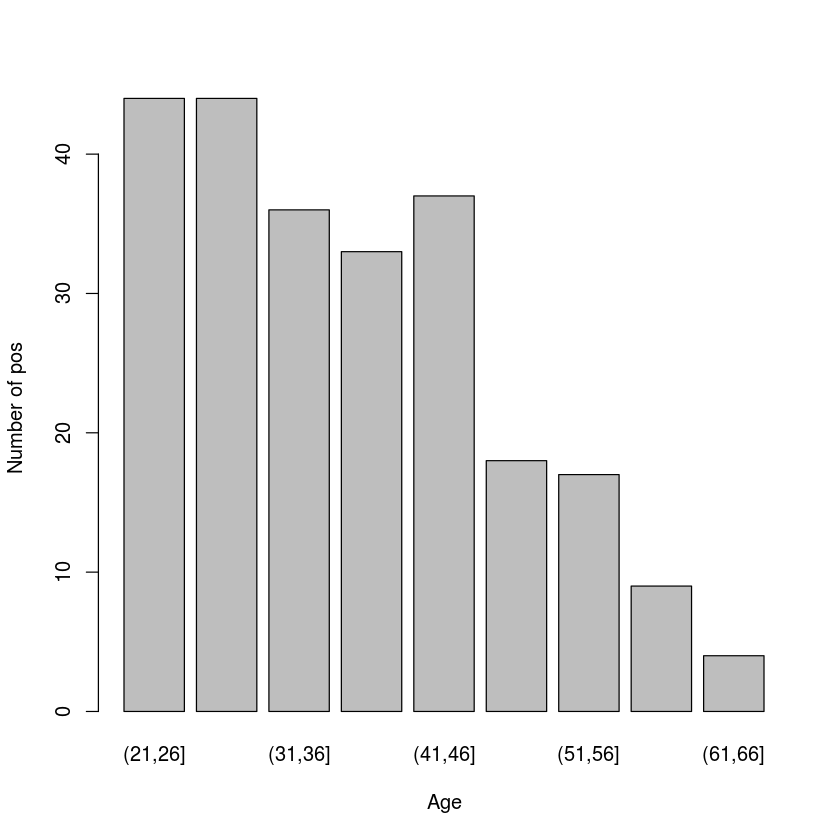

In [76]:
counts <- table(cut((data[data$diabetes == 'pos', 'age']), breaks = seq(from = 21, to = 66, by = 5)))
barplot(counts, xlab = "Age", ylab = "Number of pos")

In [77]:
y <- data$diabetes
levels(y) <- c("-1", "1")
y <- as.numeric(as.character(y))
y <- as.matrix(y)

In [78]:
x <- data
x$diabetes <- NULL
x <- as.matrix(x)
x <- scale(x)

In [79]:
set.seed(1001)
n = nrow(x)
train <- sample(1:n, 600, FALSE)

In [80]:
require(svmpath)
fit <- svmpath(x[train,], y[train,], kernel.function = radial.kernel, trace = TRUE)

[1] "convergence warning in initialization\n"
1:	Obs 8	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 17	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 18	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 20	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 40	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 46	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 50	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 65	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 68	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 73	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 85	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 87	 ->E  lambda = 3.067893  Sum Eps = 280.86 Elbow = 52 Error = 139
1:	Obs 104	 ->E  lambda = 3.067893  Sum Eps = 280.86 El

In [92]:
#error <- with(fit, Error[Error == min(Error)])
min_error_row <- which(fit$Error == min(fit$Error))
temp_lambda <- fit$lambda[min_error_row]
loc <- which(fit$lambda[min_error_row] == min(fit$lambda[min_error_row]))
lambda <- temp_lamba[loc]

In [94]:
pred_train <-predict(fit ,newx=x[train ,],lambda =lambda,type="class")
table( y[train ,],pred_train ,dnn =c("Observed","Predicted"))

        Predicted
Observed  -1   1
      -1 386   1
      1    2 211